## Assignment 1 - CS152: The 8-Puzzle

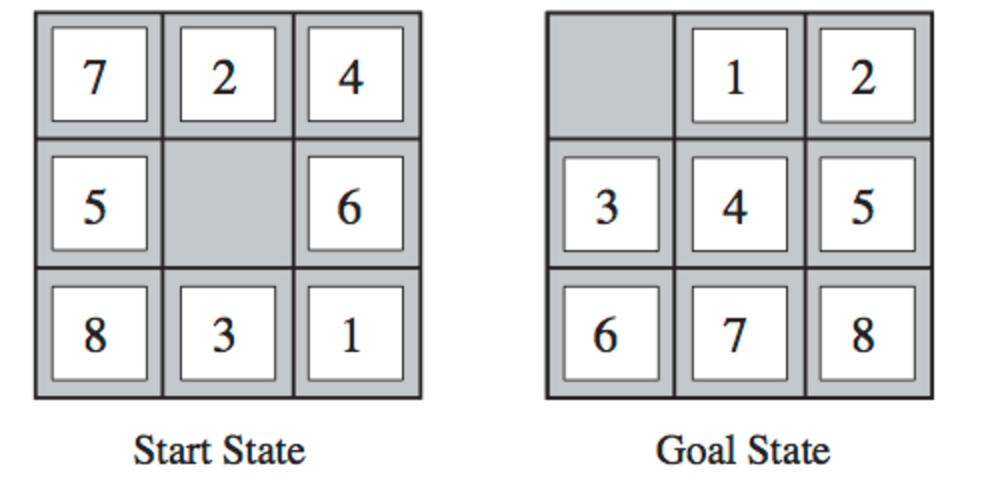

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://i.imgur.com/VVVQZNw.png",width=400,height=400,embed=True)

### Import allowed libraries:

In [15]:
# Frontier, stored as a Priority Queue to maintain ordering
from queue import PriorityQueue 

### PuzzleNode class
Define the PuzzleNode class with appropriate attributes and methods to capture the state of the 8-puzzle and its generalizations, as well as the elements needed to implement an A* star search. I used the __code provided in Class 3.1__ and made the neccesary changes:

In [3]:
class PuzzleNode:
    def __init__(self,state,fval,gval,parent=None):
        self.parent = parent
        self.state = state 
        self.fval = fval 
        self.gval = gval 
        self.pruned = False 
        
    # Comparison function based on f cost
    def __lt__(self,other):
        return self.fval < other.fval
            
    # Convert to string
    def __str__(self): 
        self.state = self.state 
        return createGrid(self.state) 

Testing whether state inputted is of the correct size and format, and contains every number from `0` to `(n^2)-1` precisely once. Returns error code `-1`, and zeros for the remaining outputs steps and frontierSize.

In [5]:
def stateCheck(n, state): 
    if not(len(set(state)) == len(state)) or len(state) > (n**2)-1:
        return -1    

Below is a function that returns the state in the form a grid so as to implement it in the **`__str__`** method to print out a grid displaying the current state of the board. This is one part I had most difficulty with as I tried implementing it without list comprehension. So I looked up Stackoverflow for similar questions and adopted the top voted answer at the following **URL: https://stackoverflow.com/questions/23023403/using-a-text-file-to-lay-out-a-words-into-a-grid-form**


In [4]:
def createGrid(g): 
    for i in range(0, len(g), size):
        chunk = g[i:i+size]
#create an array to store the grid upon addition of the rows
    grid = [] 
    for c in chunk:
        grid.append(''.join("{:<10}".format(x) for x in c)) 
    return grid

From the same [UMBC](https://www.csee.umbc.edu/courses/671/fall09/code/python/p8.py) resource above, I **directly** adapted the `successor8` function, swapping the var `size` for explicity defined integers. However, instead of using `*` to represent the blank piece, I used the `0` character for consistency.

In [6]:
def successor8(S):   
    n = size
    blank = S.index(0) 
    succs = [] 
    
    # UP: if blank not on top row, swap it with tile above it
    if blank > n-1:
        swap = blank - n
        succs.append(('U', S[0:swap] + [0] + S[swap+1:blank] + [S[swap]] + S[blank+1:]))

    # DOWN: If blank not on bottom row, swap it with tile below it
    if blank < n*2:
        swap = blank + n
        succs.append(('D', S[0:blank] + [S[swap]] + S[blank+1:swap] + [0] + S[swap+1:]))

    # LEFT: If blank not in left column, swap it with tile to the left
    if blank % n > 0:
        swap = blank - 1
        succs.append(('L', S[0:swap] + [0] + [S[swap]] + S[blank+1:]))

    # RIGHT: If blank not on right column, swap it with tile to the right
    if blank % n < n-1:
        swap = blank + 1
        succs.append(('R', S[0:blank] + [S[swap]] + [0] + S[swap+1:]))

    return succs

The function below implements the first heuristic (Misplaced Tiles) which is to calculate the number of tiles/pieces required to go from the current state to the goal state.

In [7]:
def h1(state):
    misplacedTiles = 0
    for (tile1,tile2) in zip(state, solved): 
        if  tile1 != tile2:
            misplacedTiles = misplacedTiles + 1
    return misplacedTiles

The function below implements the Manhattan Distance Heuristic

In [8]:
def h2(state):
  
    goal_state = solved
    
    # generates the list of tiles for mhd
    vals = list(range(1,size**2)) 
    
    sum = 0
    # determine cost value
    for c in vals: 
        sum = sum + manhattanDistance(state.index(c), goal_state.index(c), index)
    return sum

I used the [UMBC](https://www.csee.umbc.edu/courses/671/fall09/code/python/p8.py) resource to implement
the Manhattan Distance heuristic. However, unlike their code which has explicity defined coordinates, I 
implemented a function `Indices` to call it for any input of the initial configuration. I then use these indices
to calculate the Manhattan distance between two points each specified by two indices:

In [9]:
def manhattanDistance(n, m, index):
    x1,y1 = index[n]
    x2,y2 = index[m]
    return abs(x1-x2) + abs(y1-y2)

In [10]:
def Indices(n): 
    i = 0
    index = {}
    List = list(range(0,n**2))
    for x in range(n):
        for y in range(n):
            index[List[i]] = (y, x)
            i+=1
    return index

Specify the name attribute of the Misplaced Tiles and Manhattan Distance heuristics:

In [11]:
h1.__name__ = "Misplaced Tiles"
h2.__name__ = "Manhattan Distance"

I used the __code provided in Class 3.1__ and made the neccesary changes:

In [12]:
def solvePuzzle(n, initial_state, heuristic, display=True):

#Use the previously defined stateCheck function to check format and pieces
    if stateCheck(n+1, initial_state) == -1: 
        print ("Segmentation fault (core dumped). Provide a valid configuration of the board.")
        return 0, 0, -1

    max_frontier_size = -1
    
# Start node
    start_node = PuzzleNode(initial_state, heuristic(initial_state), 0) 
    
#Current heuristic function I want to test
    cur_heur = heuristic 
    
# set the starting state
    start = initial_state 

# Dictionary with current cost to reach all visited nodes
    costs_db = {tuple(start):start_node} 
    
    frontier = PriorityQueue() 
    frontier.put(start_node)

# next moves
    moves_orth = successor8(start_node.state) 

    frontier_size = frontier.qsize()
    
# Begin A* Search
    expansion_counter = 0 
    
    while not frontier.empty():
    # Take the next available node from the priority queue
        cur_node = frontier.get()
        moves_orth = successor8(cur_node.state)
            
    # Skip if this node has been marked for removal
        if cur_node.pruned:
            continue 
        
    # Check if we are at the goal
        if cur_node.state == solved: break

    # Expand the node in the orthogonal and diagonal directions
        for m in moves_orth:
            next_state = m[1]
            
            gval = cur_node.gval + 1 # Tentative cost value for child
            
            # If the child node is already in the cost database (i.e. explored)
            if tuple(next_state) in costs_db:
                if costs_db[tuple(next_state)].gval > gval: # Mark existing value for deletion from frontier.
                    costs_db[tuple(next_state)].pruned = True 
                else: # ignore this child, since a better path has already been found previously.
                    continue 

            hval = cur_heur(next_state) # Heuristic cost from next node to goal
            next_node = PuzzleNode(next_state, gval+hval, gval, cur_node) # Create new node for child
            frontier.put(next_node)
            frontier_size += 1
            costs_db[tuple(next_state)] = next_node #Mark the node as explored
            
            
        expansion_counter = expansion_counter + 1
        frontier_size -= 1
        if frontier_size > max_frontier_size:
            max_frontier_size = frontier_size

    # Reconstruct the optimal path
    optimal_path = [cur_node.state]
    while cur_node.parent:
        optimal_path.append((cur_node.parent).state)
        cur_node = cur_node.parent
    optimal_path = optimal_path[::-1]
    if display:
        for i in optimal_path:
            print((createGrid(i)) + "\n")
        print("A* search completed in %d steps\n"% expansion_counter)
        print("Optimal Path to Goal:\n")
        print(optimal_path)
    err = 0
    
    return len(optimal_path)-1,max_frontier_size,err

I referred to **https://www.csee.umbc.edu/courses/671/fall09/code/python/p8.py** to figure out how best to handle work with the state. They represented a grid of values in a single string. The function below transforms the input given initial configuration of the board represented by nested lists into a single string.
For best practices of OOP with respect to type( ) vs isinstance( ) I referred to the following **URL https://stackoverflow.com/questions/1549801/differences-between-isinstance-and-type-in-python** and conceded to the overwhelming response that isinstance() is preferred. 

In [13]:
def arrToString(string): 
    if isinstance(string[0], list):
        config = []
        for row in string:
            for piece in row:
                config.append(piece)
        return config
    else:
        return string

Below I run the A* code for the specified `3x3` scrambled board configurations: `[[5,7,6],[2,4,3],[8,1,0]]; [[7,0,8],[4,6,1],[5,3,2]]; [[2,3,7],[1,8,0],[6,5,4]]` and compare the performance of the Out of Place and Manhattan Distance heustrics in terms of the number of moves and the frontier size from each initial condition.


In [14]:
# Specified 3x3 scrambled board configuartions
scrambled_boards = [[[5,7,6],[2,4,3],[8,1,0]],[[7,0,8],[4,6,1],[5,3,2]],[[2,3,7],[1,8,0],[6,5,4]]]

heuristics = [h1, h2] 

for config in scrambled_boards:
    print("\nConfiguration:", config)
    size = len(config)
    config = arrToString(config)
    index = Indices(size)
    solved = list(range(0,size**2)) 
     

    for heur in heuristics:
        heuristic = heur
        steps, frontier, error = solvePuzzle(size, config, heuristic, display=False)
        print("\nHeuristic used: ",heuristic.__name__,
              "\nNumber of steps required to reach the goal state from the initial state = ", steps,
              "\nMaximum size of the frontier during the search = ", frontier,
              "\n ---------------------------")


Configuration: [[5, 7, 6], [2, 4, 3], [8, 1, 0]]

Heuristic used:  Misplaced Tiles 
Number of steps required to reach the goal state from the initial state =  28 
Maximum size of the frontier during the search =  20917 
 ---------------------------

Heuristic used:  Manhattan Distance 
Number of steps required to reach the goal state from the initial state =  28 
Maximum size of the frontier during the search =  894 
 ---------------------------

Configuration: [[7, 0, 8], [4, 6, 1], [5, 3, 2]]

Heuristic used:  Misplaced Tiles 
Number of steps required to reach the goal state from the initial state =  25 
Maximum size of the frontier during the search =  12390 
 ---------------------------

Heuristic used:  Manhattan Distance 
Number of steps required to reach the goal state from the initial state =  25 
Maximum size of the frontier during the search =  974 
 ---------------------------

Configuration: [[2, 3, 7], [1, 8, 0], [6, 5, 4]]

Heuristic used:  Misplaced Tiles 
Number of ste